In [ ]:
Установим необходим библиотеки

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 15.9 MB/s 


Следующая команда покажет название видеокарты, подходящей для использования при обучении нейронок (если такой нет - ничего не выведет)

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Видим, что видеокарта не подключена. Работая в Google Colab, мы можем подключить видеокарту с небольшим запасом бесплатного времени использования, выполнив несколько нехитрых действий. Для нашего задания необязательно использовать видеокарту, но потренироваться в ее использовании будет полезно.

Для того, чтобы подключить ядро с видеокартой, нам понадобится переключить окружение питона. Для этого нажмите `Среда выполнения -> Сменить среду выполнения` и там выберите Аппаратный ускоритель GPU.
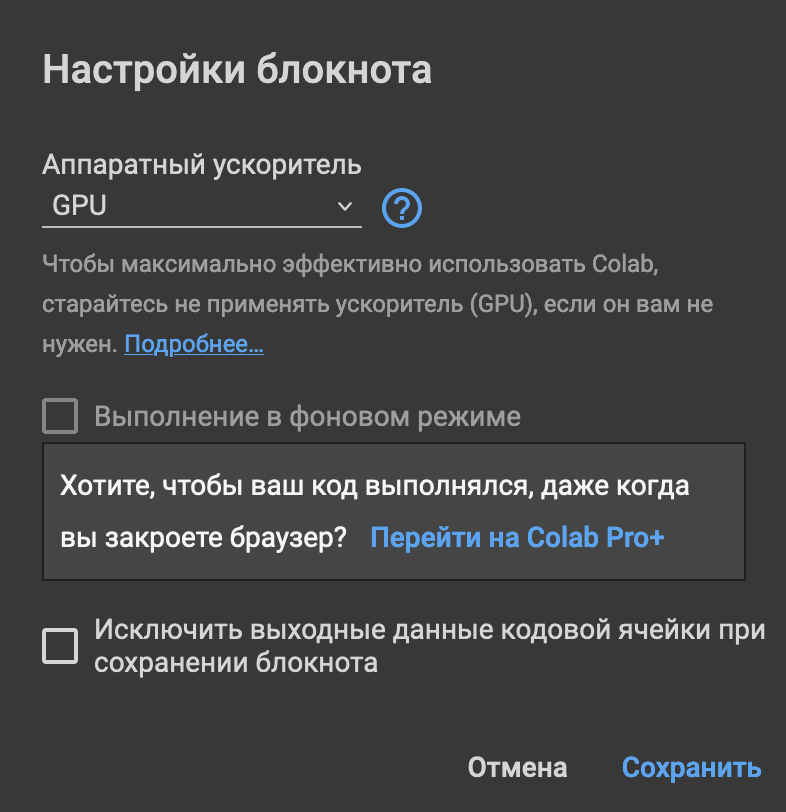

Теперь повторим код из предыдущей ячейки и увидим, что нам доступна видеокарта.

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Уточним, используется ли сейас графический процессор:

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

Если предыдущая ячейка вывела что-то вроде `/device:GPU:0`, то tensorflow использует видеокарту. Теперь начнем работу над нейронкой.

In [1]:
import numpy as np
np.random.seed(123)  # для воспроизводимости
from keras.models import Sequential                           # Sequential - это базовый класс нейронки в керасе
from keras.layers import Dense, Dropout, Activation, Flatten  # дальше импортируем классы слоев
from keras.layers import Convolution2D, MaxPooling2D          # еще немного слоев, которые предназначены именно для работы с картинками
from keras.utils import np_utils
from keras.datasets import mnist                              # а это - классический набор картинок с рукописными цифрами, которые мы будем
                                                              # классифицировать в нашем примере

Загрузим предварительно перемешанные изображения из набора MNIST. Это изображения размером 8х8 пикселей, каждый пиксель закодирован интенсивностью черного цвета - от 0 до 255. Собственно, размер изображения 8х8 говорит нам о том, что каждую картинку мы можем описать вектором из 8х8=64 чисел, значения которых могут быть от 0 до 255, т.е. каждый объект описывается 64-мя признаками.

11501568/11490434 [==============================] - 0s 0us/step


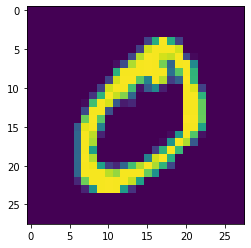

In [2]:
(X_train, y_train), (X_test_raw, y_test) = mnist.load_data()

# посмотрим на одну из картинок
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])
plt.show()

# Приведем матричный вид изображений к тому, который сможет съесть керасовская модель 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test_raw.reshape(X_test_raw.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


В нашем датасете 10 классов. При работе с нейронками мы не будем их кодировать одним числом, а проведем one-hot кодирование для класса каждого объекта. Т.е. y у нас будет не числом, а 10-мерным вектором:

In [3]:
print("y_train:", y_train)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("processed Y_train:", Y_train)

y_train: [5 0 4 ... 5 6 8]
processed Y_train: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Построим архитектуру сети средствами библиотеки keras. Будем использовать полносвязные слои (когда каждый нейрон одного слоя связан с каждым нейроном соседнего слоя), слой свертки, макспуллинга, дропаут и уплощение.

In [4]:
model = Sequential()

# свертка. Для первого слоя в сети нужно задать размер изображений, которые подаем в сеть
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
# для слоя пуллинга нужно задать количество пикселей по вертикали и горизонтали, по которым будет проводиться пуллинг,
# а также можно задать strides - смещение сетки
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))
# сплющим полученный массив
model.add(Flatten())
# обычный полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # у нас стоит задача десятиклассовой классификации, поэтому в выходном слое 10 нейронов

После того, как мы описали архитектуру сети, мы должны ее скомпилировать.

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

А теперь самое время обучить нашу скомпилированную модель:

1875/1875 [==============================] - 25s 6ms/step - loss: 0.8885 - accuracy: 0.7163
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5614 - accuracy: 0.8302
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8500
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4581 - accuracy: 0.8610
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4368 - accuracy: 0.8676
Epoch 6/6
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4164 - accuracy: 0.8731
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4028 - accuracy: 0.8777
Epoch 8/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3927 - accuracy: 0.8800
Epoch 9/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3849 - accuracy: 0.8840


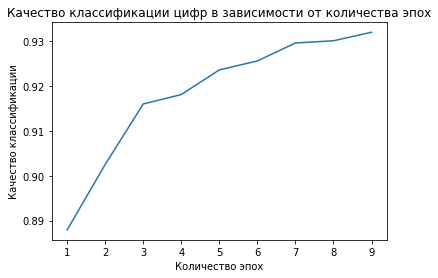

In [6]:
scores = {}
for n_epochs in range(1, 10):  # эпоха - это этап дообучения сети. Чтобы не ждать бесконечно долго,
                               # можем прерваться на том этапе, на котором качество классификации будет
                               # достаточным для решения нашей задачи. Кстати, нейронки можно дообучать
                               # с конкретной эпохи, и тогда не придется каждый раз ждать, пока пройдет
                               # полное обучение. Такой подход продемонстрирован в следующей строке: задается аргумент initial_epoch
    model.fit(X_train, Y_train, batch_size=32, epochs=n_epochs, verbose=1, initial_epoch=n_epochs-1)
                               # в предыдущей строке важен аргумент batch_size - это количество картинок в одном
                               # "наборе" изображений, на который мы делим исходную выборку для ускорения обучения
    score = model.evaluate(X_test, Y_test, verbose=0)  # замеряем текущее качество классификации
    scores[n_epochs] = score  # сохраним текущее качество, чтобы построить график

# А теперь посмотрим, как менялось качество в процессе обучения нейронки
plt.plot(list(scores.keys()), list(map(lambda x: x[1], scores.values())))
plt.xlabel("Количество эпох")
plt.ylabel("Качество классификации")
plt.title("Качество классификации цифр в зависимости от количества эпох")
plt.show()

Попробуем предсказать, какое число изображено на картинке:

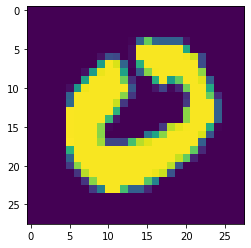

array([[9.6717256e-01, 8.7915623e-07, 2.5473011e-05, 1.5886288e-05,
        1.2365878e-03, 6.1906269e-04, 3.0170759e-02, 6.5893124e-05,
        4.0484425e-05, 6.5236160e-04]], dtype=float32)

In [7]:
plt.imshow(X_test_raw[25])
plt.show()

model.predict(np.expand_dims(X_test[25], axis=0))  # expand_dims здесь нужен потому, что model.predict, так же, как и fit,
                                                   # работает с батчами. Если мы хотим получить предсказание для одно картинки,
                                                   # мы должны подать батч из одного объекта

Сравним массив предсказаний с массивом верных ответов. Числа в предыдущей ячейке - это вероятности того, что объект принадлежит к определенному классу. Самая большая вероятность - у нулевого класса. В нижней ячейке видим, что модель в этом случае оказалась права

In [ ]:
Y_test[25]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Датасет с картинками достаточно большой, поэтому было бы слишком накладно хранить его в гите. Скачаем архив с фотографиями для задания и разархивируем его в нашу рабочую папку.

In [ ]:
# загрузим архив с фотографиями во временную папку /tmp/ и назовем его dataset.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/dataset.zip

--2022-04-18 15:26:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>]  65.43M   139MB/s    in 0.5s    

2022-04-18 15:26:48 (139 MB/s) - ‘/tmp/dataset.zip’ saved [68606236/68606236]



In [ ]:
import shutil
import zipfile

local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/dataset")
!mkdir dataset
!mv /tmp/dataset/cats_and_dogs_filtered/train/* dataset/
!mv /tmp/dataset/cats_and_dogs_filtered/validation/cats/* dataset/cats/
!mv /tmp/dataset/cats_and_dogs_filtered/validation/dogs/* dataset/dogs/
!rm -rf /tmp/dataset
!rm -rf /tmp/dataset.zip


Нам требуется подготовить модель, которая разделяет фотографии на две категории, в зависимости от того, что на них нарисовано. Будем использовать сверточную нейросеть для этого.

У нас есть набор фотографий кошек и собак. Подготовим нейронку, которая будет уметь классифицировать фотографии на те, на которых изображена кошка, и те, на которых изображена собака.

Структура папки с фотографиями следующая:
```
dataset
|- cats
|- dogs
```
Разделите изображения на тренировочную и тестовую выборки в соотношении 80/20. Сохраните их в соответствии со следующей структурой папок:
```
dataset/animals
|- train
|  |- cats
|  |- dogs
|
|- test
|  |- cats
|  |- dogs
```
Сымитируем ситуацию, когда нам регулярно приходят новые изображения, и нам нужно дообучать модель. Поэтому для раскладывания картинок по папкам **нужно написать функцию**. Очищать исходные папки не нужно.

In [ ]:
import os
from sklearn.model_selection import train_test_split
def train_test_split_images(root_folder: str):
    cats_imgs = os.listdir(f'{root_folder}/cats/')
    dogs_imgs = os.listdir(f'{root_folder}/dogs/')
    if not os.path.isdir(f'{root_folder}/animals'):
      os.mkdir(f'{root_folder}/animals')
    
    if not os.path.isdir(f'{root_folder}/animals/train'):
      os.mkdir(f'{root_folder}/animals/train')
    if not os.path.isdir(f'{root_folder}/animals/test'): 
      os.mkdir(f'{root_folder}/animals/test')

    if not os.path.isdir(f'{root_folder}/animals/train/cats'):
      os.mkdir(f'{root_folder}/animals/train/cats')
    
    if not os.path.isdir(f'{root_folder}/animals/train/dogs'):
      os.mkdir(f'{root_folder}/animals/train/dogs')

    if not os.path.isdir(f'{root_folder}/animals/test/cats'):
      os.mkdir(f'{root_folder}/animals/test/cats')
    if not os.path.isdir(f'{root_folder}/animals/test/dogs'):
      os.mkdir(f'{root_folder}/animals/test/dogs')

    cats_imgs_train, cats_imgs_test = train_test_split(cats_imgs, test_size=0.2, random_state = 21)
    dogs_imgs_train, dogs_imgs_test = train_test_split(dogs_imgs, test_size=0.2, random_state = 21)

    for i in cats_imgs_train:
      try:
        os.replace("dataset/cats/"f'{i}', "dataset/animals/train/cats/"f'{i}')
      except FileNotFoundError:
        continue

    for i in dogs_imgs_train:
      try:
        os.replace("dataset/dogs/"f'{i}', "dataset/animals/train/dogs/"f'{i}')
      except FileNotFoundError:
        continue

    for i in cats_imgs_test:
      try:
        os.replace("dataset/cats/"f'{i}', "dataset/animals/test/cats/"f'{i}')
      except FileNotFoundError:
        continue

    for i in dogs_imgs_test:
      try:
        os.replace("dataset/dogs/"f'{i}', "dataset/animals/test/dogs/"f'{i}')
      except FileNotFoundError:
        continue

In [ ]:
train_test_split_images('dataset')

В этой работе мы будем использовать нейросеть определенного типа - VGG19 с весами ResNet, параметры изображений для которой зададим заранее.

In [ ]:
import numpy as np
np.random.seed(123)  # для воспроизводимости
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Dense
from keras.utils import np_utils
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

# размер для ResNet'a
img_width, img_height = 224, 224

# корневая папка
root_dir = 'dataset'  # введите сюда адрес корневой папки
# папка с тренировочными картинками
train_dir = os.path.join(root_dir, 'animals', 'train')
# и папка с тестовыми
test_dir = os.path.join(root_dir, 'animals', 'test')
# размер батча
batch_size = 16

В фотографиях, с которыми придется иметь дело нейросети, кошки и собаки могут быть абсолютно разные, сфотографированные под разными углами и с разной степенью приближения. Имея конечную тренировочную выборку, мы можем ее расширить, поворачивая и приближая имеющиеся изображения. В этом нам поможет класс [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # приведем значения пикселей к 0-1
    shear_range=0.2,   # максимальный угол поворота изображений
    zoom_range=0.2,    # максимальное приближение изображений
    horizontal_flip=True)  # используем повороты изображений для обогащения обучающей выборки

test_datagen = ImageDataGenerator(rescale=1. / 255)  # замер качества мы должны проводить на оригинальных изображениях, 
                                                     # поэтому тестовую выборку мы не будем вращать и приближать

Далее считаем изображения из папки, приведя их к тому размеру, с которым работает сеть VGG19. Кстати говоря, преимущество ImageDataGenerator'а в том, что картинки, разложенные по подпапкам, автоматически считаются объектами разных классов.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator =  train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.




Построим модель. Сначала найдем в интернете архитектуру, описанную в официальном репозитории кераса на github.com, - VGG19 и опишем нейросеть по этой архитектуре через keras.

In [ ]:
VGG_19_pre_trained= tf.keras.applications.VGG19(include_top=True, weights='imagenet', input_tensor=None,input_shape=(224, 224, 3), pooling='max', classes=1000,classifier_activation='softmax')
print(VGG_19_pre_trained.summary())

574726144/574710816 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
model = Sequential()
model.add(Convolution2D(64, (3, 3),
                      activation='relu',
                      padding='same',input_shape=(224,224,3)))


In [ ]:
model.add(Convolution2D(64, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Convolution2D(128, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(128, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Convolution2D(256, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(256, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(256, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(256, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
model.add(Convolution2D(512, (3, 3),
                      activation='relu',
                      padding='same'))
#model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
#model.add(Dense(10,activation='softmax'))

In [ ]:
os.getcwd()

'/content'

In [ ]:
model.save_weights('dataset/vgg19_weights_tf_dim_ordering_tf_kernels.h5')

In [ ]:
model.load_weights(os.path.join(root_dir, 'vgg19_weights_tf_dim_ordering_tf_kernels.h5'))

Осталось добавить полносвязный слой из двух нейронов (по количеству наших классов) с функцией активации softmax, чтобы наша модель могла производить бинарную классификацию изображений.

In [ ]:
model.add(Dense(2,activation='softmax'))  # добавьте полносвязный слой, состоящий из двух нейронов, с функцией активации softmax

Скомпилируем и обучим сеть. Поскольку данные у нас теперь будут подаваться через генераторы, обучать модель нужно не методом fit, а методом fit_generator.

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# для примера обучим одну эпоху
model.fit_generator(
    train_generator,
    steps_per_epoch=250 // batch_size,
    epochs=1,
    workers=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


15/15 [==============================] - 29s 618ms/step - loss: 0.6933 - accuracy: 0.5167


Обучаем 20 эпох сети, замеряя качество после каждой эпохи, и строим график зависимости качества классификации от количества эпох сети. 

In [ ]:

scores = {}
for n_epochs in range(1, 20):  # эпоха - это этап дообучения сети. Чтобы не ждать бесконечно долго,
                               # можем прерваться на том этапе, на котором качество классификации будет
                               # достаточным для решения нашей задачи. Кстати, нейронки можно дообучать
                               # с конкретной эпохи, и тогда не придется каждый раз ждать, пока пройдет
                               # полное обучение. Такой подход продемонстрирован в следующей строке: задается аргумент initial_epoch
    model.fit(train_generator, batch_size=32, epochs=n_epochs, verbose=1, initial_epoch=n_epochs-1)
                               # в предыдущей строке важен аргумент batch_size - это количество картинок в одном
                               # "наборе" изображений, на который мы делим исходную выборку для ускорения обучения
    score = model.evaluate(test_generator, verbose=0)  # замеряем текущее качество классификации
    scores[n_epochs] = score  # сохраним текущее качество, чтобы построить график



150/150 [==============================] - 94s 623ms/step - loss: 0.6932 - accuracy: 0.5125
Epoch 2/2
150/150 [==============================] - 94s 625ms/step - loss: 0.6934 - accuracy: 0.4988
Epoch 3/3
150/150 [==============================] - 94s 625ms/step - loss: 0.6932 - accuracy: 0.5042
Epoch 4/4
150/150 [==============================] - 94s 623ms/step - loss: 0.6934 - accuracy: 0.4946
Epoch 5/5
150/150 [==============================] - 94s 623ms/step - loss: 0.6933 - accuracy: 0.4900
Epoch 6/6
150/150 [==============================] - 94s 624ms/step - loss: 0.6931 - accuracy: 0.5021
Epoch 7/7
150/150 [==============================] - 94s 622ms/step - loss: 0.6933 - accuracy: 0.5008
Epoch 8/8
150/150 [==============================] - 94s 623ms/step - loss: 0.6932 - accuracy: 0.5092
Epoch 9/9
150/150 [==============================] - 94s 628ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 10/10
150/150 [==============================] - 94s 624ms/step - loss: 0.6926 - accur

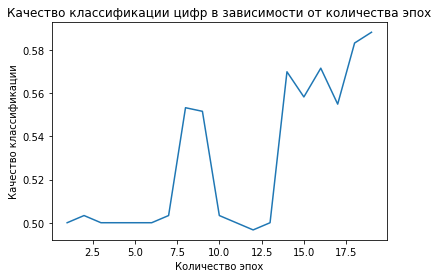

In [ ]:
from matplotlib import pyplot as plt
# А теперь посмотрим, как менялось качество в процессе обучения нейронки
plt.plot(list((scores.keys())), list(map(lambda x: (x[1]), (scores.values()))))
plt.xlabel("Количество эпох")
plt.ylabel("Качество классификации")
plt.title("Качество классификации цифр в зависимости от количества эпох")
plt.show()

В keras описаны некоторые популярные архитектуры нейросетей. При этом их можно использовать в качестве одного из слоев другой нейросети. В частности, есть готовый класс, в котором описана VGG19 с теми весами, которые мы подгружали из файла (ImageNet).

In [ ]:
from keras.applications.vgg19 import VGG19

ready_model = Sequential()
ready_model.add(VGG19(weights='imagenet'))
ready_model.add(Dense(2, activation='softmax')) 
ready_model.compile(optimizer='sgd', loss='categorical_crossentropy')

Существует много встроенных архитектур. Построим модели с использованием архитектуры VGG16 и Inception V3

In [ ]:
from keras.applications.vgg16 import VGG16

model1 = Sequential()
model1.add(VGG16(weights='imagenet'))
model1.add(Dense(2, activation='softmax')) 
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
scores = {}
for n_epochs in range(1, 20):  # эпоха - это этап дообучения сети. Чтобы не ждать бесконечно долго,
                               # можем прерваться на том этапе, на котором качество классификации будет
                               # достаточным для решения нашей задачи. Кстати, нейронки можно дообучать
                               # с конкретной эпохи, и тогда не придется каждый раз ждать, пока пройдет
                               # полное обучение. Такой подход продемонстрирован в следующей строке: задается аргумент initial_epoch
    model1.fit(train_generator, batch_size=32, epochs=n_epochs, verbose=1, initial_epoch=n_epochs-1)
                               # в предыдущей строке важен аргумент batch_size - это количество картинок в одном
                               # "наборе" изображений, на который мы делим исходную выборку для ускорения обучения
    score = model1.evaluate(test_generator, verbose=0)  # замеряем текущее качество классификации
    scores[n_epochs] = score  # сохраним текущее качество, чтобы построить график


150/150 [==============================] - 70s 458ms/step - loss: 0.6925 - accuracy: 0.5283
Epoch 2/2
150/150 [==============================] - 69s 458ms/step - loss: 0.6682 - accuracy: 0.6975
Epoch 3/3
150/150 [==============================] - 69s 459ms/step - loss: 0.5555 - accuracy: 0.8562
Epoch 4/4
150/150 [==============================] - 69s 459ms/step - loss: 0.4327 - accuracy: 0.9158
Epoch 5/5
150/150 [==============================] - 69s 459ms/step - loss: 0.3606 - accuracy: 0.9212
Epoch 6/6
150/150 [==============================] - 69s 459ms/step - loss: 0.3277 - accuracy: 0.9217
Epoch 7/7
150/150 [==============================] - 69s 460ms/step - loss: 0.2723 - accuracy: 0.9458
Epoch 8/8
150/150 [==============================] - 69s 459ms/step - loss: 0.2232 - accuracy: 0.9608
Epoch 9/9
150/150 [==============================] - 69s 459ms/step - loss: 0.2263 - accuracy: 0.9496
Epoch 10/10
150/150 [==============================] - 69s 458ms/step - loss: 0.1750 - accur

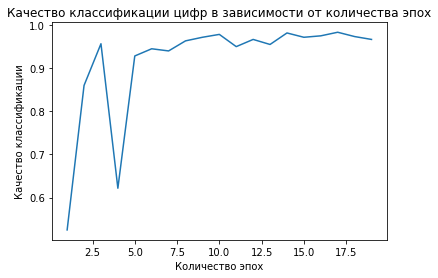

In [ ]:
plt.plot(list((scores.keys())), list(map(lambda x: (x[1]), (scores.values()))))
plt.xlabel("Количество эпох")
plt.ylabel("Качество классификации")
plt.title("Качество классификации цифр в зависимости от количества эпох")
plt.show()

In [ ]:
from keras.applications.inception_v3 import InceptionV3

model2 = Sequential()
model2.add(InceptionV3(weights='imagenet'))
model2.add(Dense(2, activation='softmax')) 
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

96124928/96112376 [==============================] - 1s 0us/step


150/150 [==============================] - 60s 331ms/step - loss: 0.6924 - accuracy: 0.5233
Epoch 2/2
150/150 [==============================] - 50s 332ms/step - loss: 0.6904 - accuracy: 0.6037
Epoch 3/3
150/150 [==============================] - 52s 342ms/step - loss: 0.6863 - accuracy: 0.5738
Epoch 4/4
150/150 [==============================] - 51s 337ms/step - loss: 0.6792 - accuracy: 0.6950
Epoch 5/5
150/150 [==============================] - 50s 334ms/step - loss: 0.6661 - accuracy: 0.7342
Epoch 6/6
150/150 [==============================] - 50s 332ms/step - loss: 0.6463 - accuracy: 0.7533
Epoch 7/7
150/150 [==============================] - 50s 330ms/step - loss: 0.6074 - accuracy: 0.7896
Epoch 8/8
150/150 [==============================] - 50s 331ms/step - loss: 0.5424 - accuracy: 0.8675
Epoch 9/9
150/150 [==============================] - 50s 330ms/step - loss: 0.4635 - accuracy: 0.9246
Epoch 10/10
150/150 [==============================] - 50s 329ms/step - loss: 0.3965 - accur

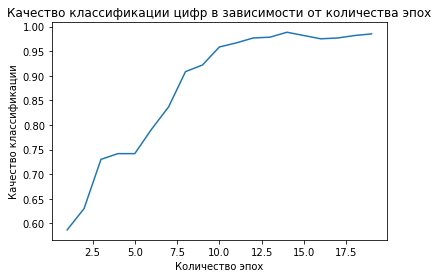

In [ ]:
scores = {}
for n_epochs in range(1, 20):  # эпоха - это этап дообучения сети. Чтобы не ждать бесконечно долго,
                               # можем прерваться на том этапе, на котором качество классификации будет
                               # достаточным для решения нашей задачи. Кстати, нейронки можно дообучать
                               # с конкретной эпохи, и тогда не придется каждый раз ждать, пока пройдет
                               # полное обучение. Такой подход продемонстрирован в следующей строке: задается аргумент initial_epoch
    model2.fit(train_generator, batch_size=32, epochs=n_epochs, verbose=1, initial_epoch=n_epochs-1)
                               # в предыдущей строке важен аргумент batch_size - это количество картинок в одном
                               # "наборе" изображений, на который мы делим исходную выборку для ускорения обучения
    score = model2.evaluate(test_generator, verbose=0)  # замеряем текущее качество классификации
    scores[n_epochs] = score  # сохраним текущее качество, чтобы построить график
    
plt.plot(list((scores.keys())), list(map(lambda x: (x[1]), (scores.values()))))
plt.xlabel("Количество эпох")
plt.ylabel("Качество классификации")
plt.title("Качество классификации цифр в зависимости от количества эпох")
plt.show()